In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import xarray as xr
import os

<font style="color:red; font-size:2.5em">TALLER 3</font>

A partir de la siguiente información proporcionada, van a realizar un análisis exploratorio de los datos de PM2.5 registrados en la ciudad de Bogotá en diferentes años. Para ello puede guiarse de las demostraciones mostradas en las siguientes líneas de código o guiarse de los temas vistos en clases.

In [2]:
os.listdir()

['.ipynb_checkpoints',
 'COBogota_2019-2022.tif',
 'COBogota_2019-2022.tif.aux.xml',
 'CO_Bogotá_2019-2022.png',
 'PM25.csv',
 'Taller1.ipynb',
 'Taller2.ipynb',
 'Taller3.ipynb']

In [3]:
df= pd.read_csv("PM25.csv")

In [4]:
df.columns 

Index(['FECHA', 'BOLIVIA', 'BOSA', 'CARVAJAL', 'CENTRO DE ALTO RENDIMIENTO',
       'CIUDAD BOLIVAR', 'FONTIBON', 'GUAYMARAL', 'JAZMIN', 'KENNEDY',
       'LAS FERIAS', 'MIN AMBIENTE', 'PUENTE ARANDA', 'SAN CRISTOBAL', 'SUBA',
       'TUNAL', 'USAQUEN', 'USME'],
      dtype='object')

In [5]:
df.head()

,FECHA,BOLIVIA,BOSA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,GUAYMARAL,JAZMIN,KENNEDY,LAS FERIAS,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME
0,2013-01-01 00:00:00,NaN,NaN,NaN,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 01:00:00,NaN,NaN,NaN,33.8,NaN,NaN,NaN,NaN,104.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 02:00:00,NaN,NaN,NaN,20.2,NaN,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 03:00:00,NaN,NaN,NaN,19.1,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 04:00:00,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
test2013 = df[df['FECHA'].str.contains('2013-')]

In [7]:
test2013[test2013.columns]

,FECHA,BOLIVIA,BOSA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,GUAYMARAL,JAZMIN,KENNEDY,LAS FERIAS,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME
0,2013-01-01 00:00:00,NaN,NaN,NaN,17.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 01:00:00,NaN,NaN,NaN,33.8,NaN,NaN,NaN,NaN,104.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 02:00:00,NaN,NaN,NaN,20.2,NaN,NaN,NaN,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 03:00:00,NaN,NaN,NaN,19.1,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 04:00:00,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2013-12-31 19:00:00,NaN,NaN,16.5,6.6,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,2.7,NaN
8756,2013-12-31 20:00:00,NaN,NaN,15.2,13.5,NaN,NaN,NaN,NaN,15.3,NaN,NaN,NaN,NaN,NaN,NaN,3.8,NaN
8757,2013-12-31 21:00:00,NaN,NaN,21.3,11.0,NaN,NaN,NaN,NaN,27.5,NaN,NaN,NaN,NaN,NaN,NaN,4.1,NaN
8758,2013-12-31 22:00:00,NaN,NaN,22.7,6.3,NaN,NaN,NaN,NaN,30.0,6.7,NaN,NaN,NaN,NaN,NaN,3.1,NaN


In [8]:
means = []
z = df[df['FECHA'].str.contains('2013-')]
z_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()
means.append(z_mean)
z = df[df['FECHA'].str.contains('2014-')]
z_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()
means.append(z_mean)
z = df[df['FECHA'].str.contains('2015-')]
z_mean = z['CENTRO DE ALTO RENDIMIENTO'].mean()
means.append(z_mean)

In [9]:
means

[19.59083595662819, 21.495681112261497, 17.33912769444094]

In [10]:
sta_means = []
z = df[df['FECHA'].str.contains('2013-')]
sta_means.append(z[z.columns[1]].mean())
sta_means.append(z[z.columns[2]].mean())
sta_means.append(z[z.columns[3]].mean())
sta_means.append(z[z.columns[4]].mean())

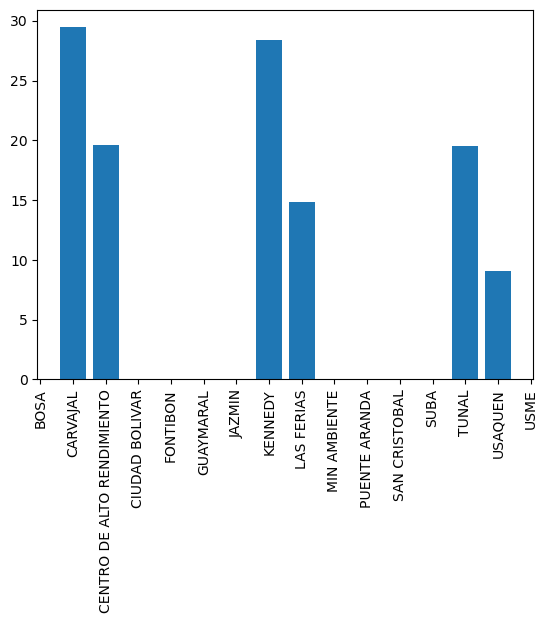

In [11]:
sta_means = []

for i in df.columns[1:]:
    z = df[df['FECHA'].str.contains('2013-')]
    zl = z [i].mean()
    sta_means.append(zl)
    
plt.bar(df.columns[1:],sta_means)
plt.xticks(rotation=90)
plt.show()

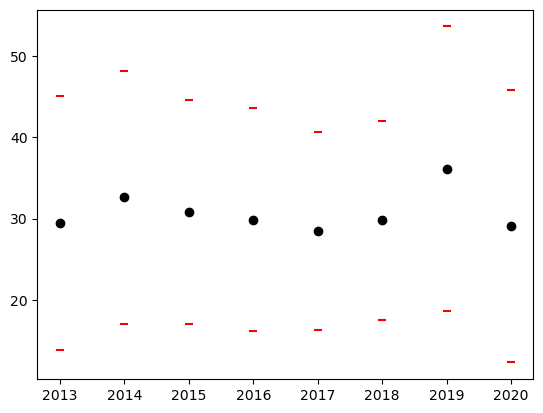

In [12]:
# que pasa si queremos una estación con todos los años (carvajal)
years = np.arange(2013,2021)
year_mean = []
year_std=[]
for year in years:
    z = df[df['FECHA'].str.contains(str(year)+'-')]
    zl = z['CARVAJAL'].mean()
    zs = z['CARVAJAL'].std()
    year_mean.append(zl)
    year_std.append(zs)
    
plt.scatter(years,year_mean,color ='k')
plt.scatter(years,np.array(year_mean) + year_std, color = 'r', marker = '_')
plt.scatter(years,np.array(year_mean) - year_std, color = 'r', marker = '_')

In [13]:
mat_me = np.ones([17,8])
years = np.arange(2013,2021)

for i,year in enumerate(years):
    z = df[df['FECHA'].str.contains(str(year)+'-')]
    for j,sta in enumerate(df.columns[1:]):
        zl = z[sta].mean()
        mat_me[j,i] = zl

In [14]:
import matplotlib.gridspec as gridspec
from pylab import* # matrices de graficas!!!

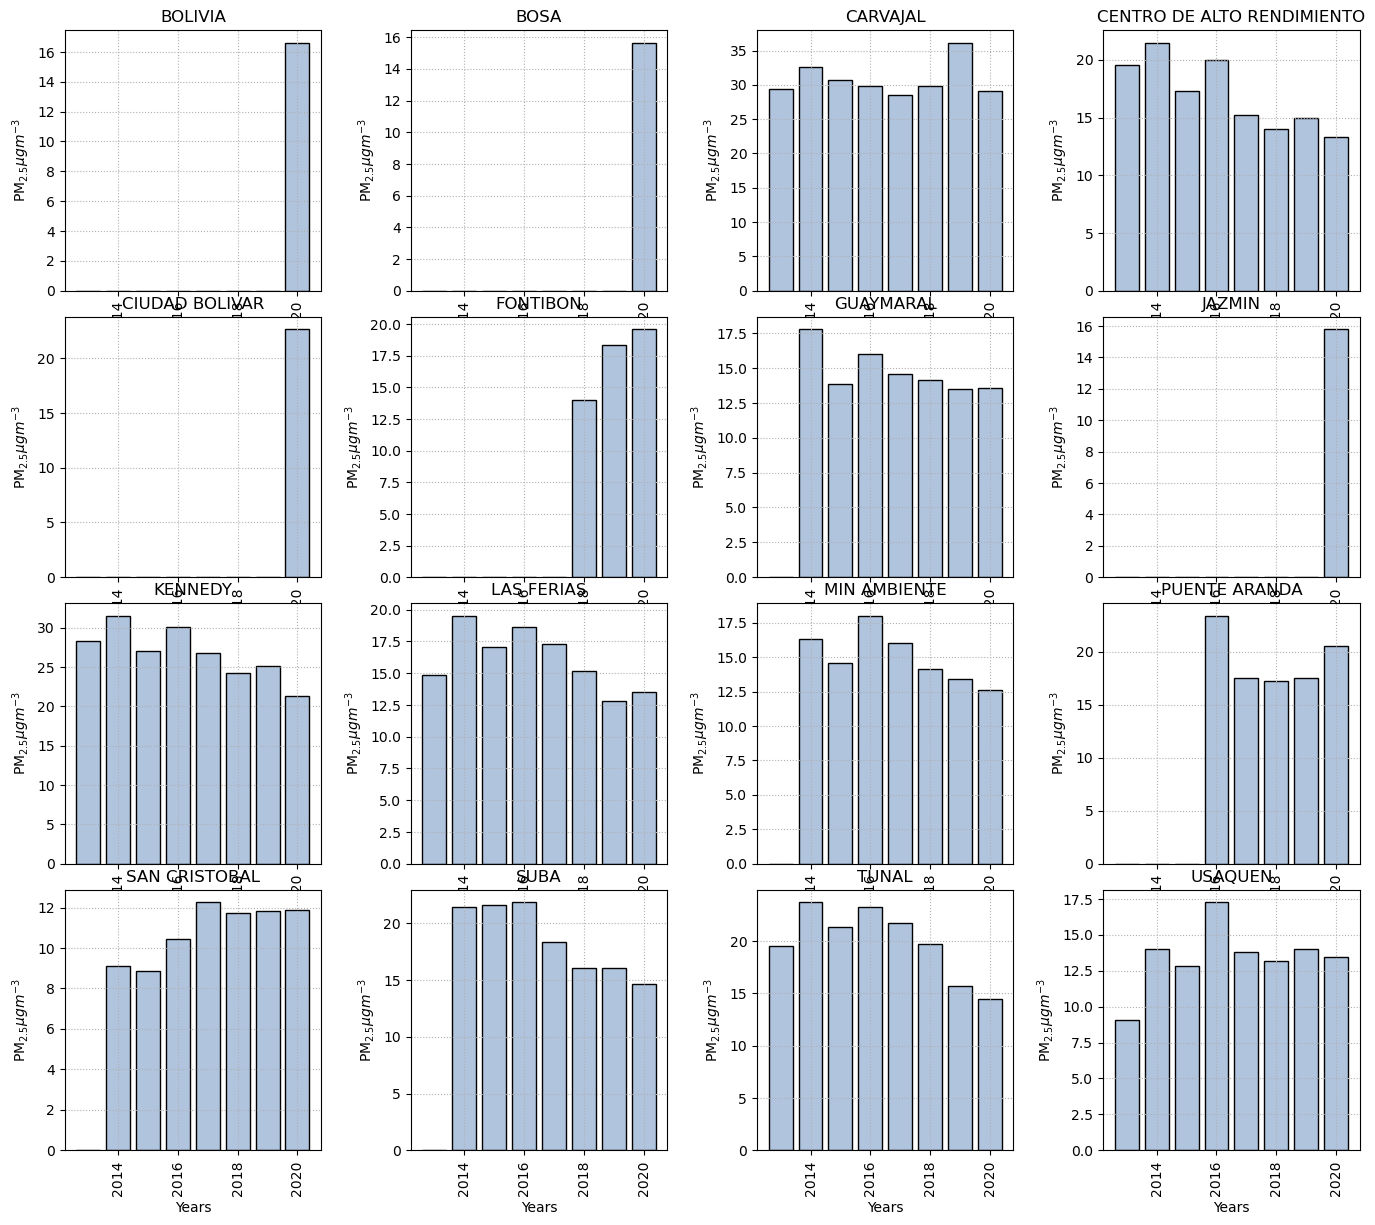

In [15]:
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(4,4, left=0.05, right=0.975, hspace=0.1, wspace=0.35, top=0.9, bottom=0.1)
Nombres = df.columns[1:]
for i in range (16):   
    ax = subplot (gs[i])
    plt.xlabel("Years")
    plt.xticks(rotation=90)
    plt.grid(linestyle=":")
    plt.ylabel("PM$_{2.5}$$\mu g $$m^{-3}$")
    plt.title(Nombres[i])
    plt.bar(years,np.nan_to_num(mat_me[i,:]), color = 'lightsteelblue', edgecolor ='k')

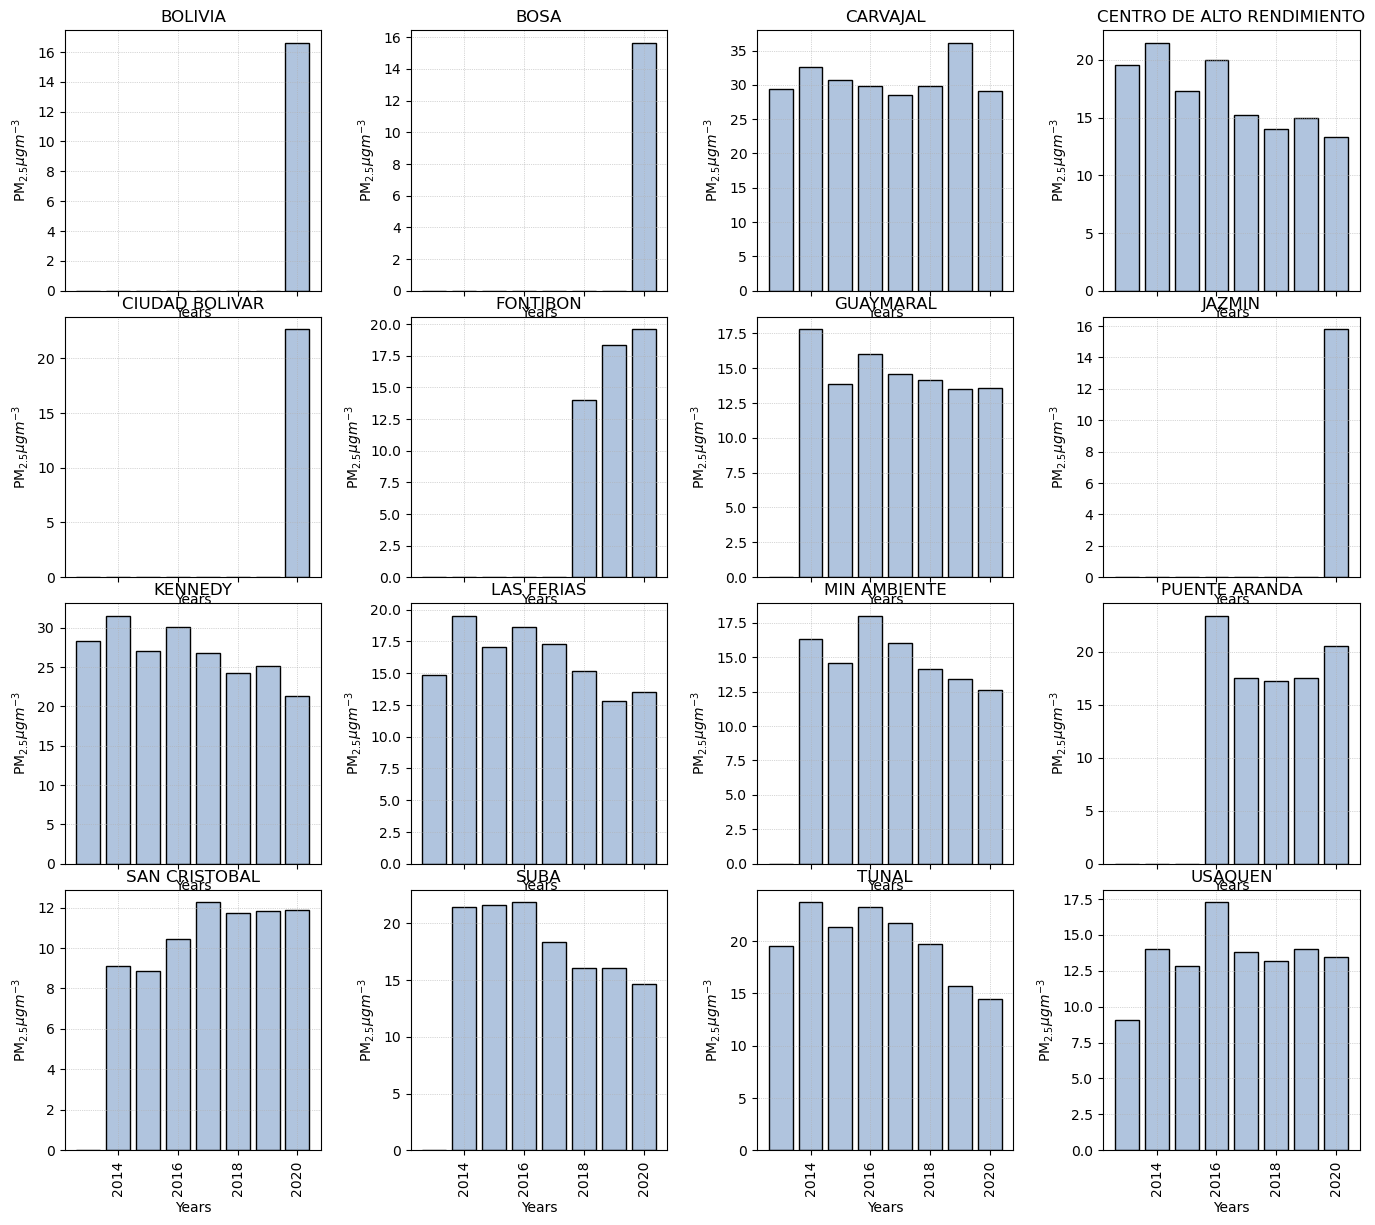

In [16]:
fig = plt.figure(figsize=(14,14))
gs = gridspec.GridSpec(4,4, left=0.05, right=0.975, hspace=0.1, wspace=0.35, top=0.9, bottom=0.1)
Nombres = df.columns[1:]
for i in range (16):   
    ax = subplot (gs[i])
    plt.xlabel("Years")
    plt.xticks(rotation=90)
    plt.grid(linestyle=":",linewidth=0.5)
    plt.ylabel("PM$_{2.5}$$\mu g $$m^{-3}$")
    plt.title(Nombres[i])
    plt.bar(years,np.nan_to_num(mat_me[i,:]), color = 'lightsteelblue', edgecolor ='k')
    if i<12:
        ax.xaxis.set_major_formatter(NullFormatter())

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FECHA                       70128 non-null  object 
 1   BOLIVIA                     3222 non-null   float64
 2   BOSA                        1787 non-null   float64
 3   CARVAJAL                    57211 non-null  float64
 4   CENTRO DE ALTO RENDIMIENTO  58912 non-null  float64
 5   CIUDAD BOLIVAR              1812 non-null   float64
 6   FONTIBON                    17333 non-null  float64
 7   GUAYMARAL                   49951 non-null  float64
 8   JAZMIN                      2059 non-null   float64
 9   KENNEDY                     66564 non-null  float64
 10  LAS FERIAS                  53575 non-null  float64
 11  MIN AMBIENTE                54517 non-null  float64
 12  PUENTE ARANDA               32436 non-null  float64
 13  SAN CRISTOBAL               507

In [22]:
df["FECHA"] = pd.to_datetime(df["FECHA"])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70128 entries, 0 to 70127
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   FECHA                       70128 non-null  datetime64[ns]
 1   BOLIVIA                     3222 non-null   float64       
 2   BOSA                        1787 non-null   float64       
 3   CARVAJAL                    57211 non-null  float64       
 4   CENTRO DE ALTO RENDIMIENTO  58912 non-null  float64       
 5   CIUDAD BOLIVAR              1812 non-null   float64       
 6   FONTIBON                    17333 non-null  float64       
 7   GUAYMARAL                   49951 non-null  float64       
 8   JAZMIN                      2059 non-null   float64       
 9   KENNEDY                     66564 non-null  float64       
 10  LAS FERIAS                  53575 non-null  float64       
 11  MIN AMBIENTE                54517 non-null  float64   

In [24]:
df.insert(1,"Anio",df.FECHA.dt.year)

In [25]:
df.insert(2,"mes",df.FECHA.dt.month)

In [26]:
df.insert(3,"day",df.FECHA.dt.day)

In [27]:
df.head()

,FECHA,Anio,mes,day,BOLIVIA,BOSA,CARVAJAL,CENTRO DE ALTO RENDIMIENTO,CIUDAD BOLIVAR,FONTIBON,...,JAZMIN,KENNEDY,LAS FERIAS,MIN AMBIENTE,PUENTE ARANDA,SAN CRISTOBAL,SUBA,TUNAL,USAQUEN,USME
0,2013-01-01 00:00:00,2013,1,1,NaN,NaN,NaN,17.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01 01:00:00,2013,1,1,NaN,NaN,NaN,33.8,NaN,NaN,...,NaN,104.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01 02:00:00,2013,1,1,NaN,NaN,NaN,20.2,NaN,NaN,...,NaN,129.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01 03:00:00,2013,1,1,NaN,NaN,NaN,19.1,NaN,NaN,...,NaN,94.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01 04:00:00,2013,1,1,NaN,NaN,NaN,28.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


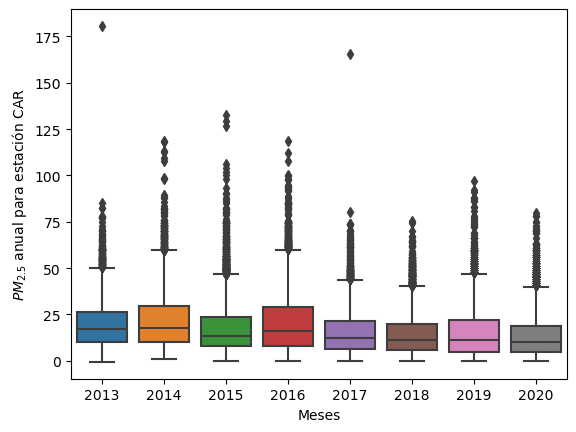

In [28]:
sns.boxplot(x='Anio', y='CENTRO DE ALTO RENDIMIENTO', data=df)
plt.ylabel("$PM_{2.5}$ anual para estación CAR")
plt.xlabel("Meses")
plt.show()